# DNN Classification with Tensorflow

## Prepare the data

### Load the dataset

In [45]:
# import the libraries we will use
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read a CSV file, french style
df = pd.read_csv('Churn.csv',sep=',')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Split into training & testing data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Separete the input data and the value to predict (the 'Exited' column).
# By convention: X is the input data and Y is the value to predict.
x_data = df.drop(['Exited'],axis=1)
y_val = df['Exited']

In [6]:
# Separate the dataset in two parts:
# 70% of the data will be used for training the model
# 30% to test it
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [7]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,5012.097857,1.569127e+07,651.217857,38.766714,5.010714,77146.268254,1.527857,0.709000,0.510429,100066.450221
std,2885.513274,7.179397e+04,96.670607,10.484941,2.897550,62317.167188,0.582961,0.454256,0.499927,57764.876058
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,2529.750000,1.562869e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50910.677500
50%,5008.500000,1.569176e+07,652.000000,37.000000,5.000000,97572.740000,1.000000,1.000000,1.000000,100600.355000
75%,7513.250000,1.575336e+07,719.000000,44.000000,8.000000,127894.435000,2.000000,1.000000,1.000000,149539.850000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000


### Scale the data

In [8]:
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [9]:
# Get around a bug in Sklearn / Pandas communication
# see https://stackoverflow.com/questions/45090639/pandas-shows-settingwithcopywarning-after-train-test-split
X_train.is_copy=None
X_test.is_copy=None

In [10]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
803,804,15712825,Howells,511,Spain,Female,29,9,0.0,2,0,1,140676.98
1387,1388,15674526,Byrne,725,France,Male,66,4,86459.8,1,1,1,141476.56
921,922,15743411,Chiawuotu,609,Spain,Male,61,1,0.0,1,1,0,22447.85
5917,5918,15812184,Rose,674,France,Female,31,1,0.0,1,1,0,128954.05
9610,9611,15812534,Chiemenam,455,France,Male,40,1,0.0,3,0,1,129975.34


In [11]:
for col in cols_to_scale:
    xmin=X_train[[col]].min().values[0]
    dx=X_train[col].max()-xmin
    X_train[[col]] = X_train[[col]].apply(lambda x: ((x - xmin) / dx))
    X_test[[col]] = X_test[[col]].apply(lambda x: ((x - xmin) / dx))

In [12]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
803,804,15712825,Howells,0.322,Spain,Female,29,0.9,0.000000,0.333333,0,1,0.703471
1387,1388,15674526,Byrne,0.750,France,Male,66,0.4,0.344601,0.000000,1,1,0.707469
921,922,15743411,Chiawuotu,0.518,Spain,Male,61,0.1,0.000000,0.000000,1,0,0.112204
5917,5918,15812184,Rose,0.648,France,Female,31,0.1,0.000000,0.000000,1,0,0.644844
9610,9611,15812534,Chiemenam,0.210,France,Male,40,0.1,0.000000,0.666667,0,1,0.649952


In [13]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,5012.097857,1.569127e+07,0.602436,38.766714,0.501071,0.307480,0.175952,0.709000,0.510429,0.500377
std,2885.513274,7.179397e+04,0.193341,10.484941,0.289755,0.248376,0.194320,0.454256,0.499927,0.288883
min,1.000000,1.556571e+07,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2529.750000,1.562869e+07,0.468000,32.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.254547
50%,5008.500000,1.569176e+07,0.604000,37.000000,0.500000,0.388894,0.000000,1.000000,1.000000,0.503047
75%,7513.250000,1.575336e+07,0.738000,44.000000,0.800000,0.509747,0.333333,1.000000,1.000000,0.747794
max,10000.000000,1.581569e+07,1.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Create the tensorflow estimator

In [14]:
import tensorflow as tf

### Create the 'feature columns'

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
# create the numeric columns
age = tf.feature_column.numeric_column('Age')
creditscore = tf.feature_column.numeric_column('CreditScore')
tenure = tf.feature_column.numeric_column('Tenure')
balance = tf.feature_column.numeric_column('Balance')
numproducts = tf.feature_column.numeric_column('NumOfProducts')
hascard = tf.feature_column.numeric_column('HasCrCard')
isactive = tf.feature_column.numeric_column('IsActiveMember')
estimated = tf.feature_column.numeric_column('EstimatedSalary')

In [17]:
# create categorical columns
geography = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(key='Geography',vocabulary_list=df['Geography'].unique()))
gender = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(key='Gender',vocabulary_list=df['Gender'].unique()))

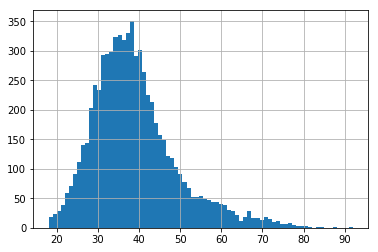

In [61]:
X_train['Age'].hist(bins=75)

In [20]:
# Discretize the age column 
age_b = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [59]:
feat_cols = [age_b,creditscore,tenure,balance,numproducts,hascard,isactive,estimated,geography,gender ]

### Create the input function

In [23]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Create the estimator and train it

In [24]:
model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_session_config': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/2c/gpl2fhbx4kgft314vh0y0qq80000gn/T/tmpkr2dtr3x'}


In [25]:
model.train(input_fn=input_fn,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/2c/gpl2fhbx4kgft314vh0y0qq80000gn/T/tmpkr2dtr3x/model.ckpt.
INFO:tensorflow:step = 1, loss = 7.52619
INFO:tensorflow:global_step/sec: 199.068
INFO:tensorflow:step = 101, loss = 3.53135 (0.503 sec)
INFO:tensorflow:global_step/sec: 208.127
INFO:tensorflow:step = 201, loss = 4.99815 (0.486 sec)
INFO:tensorflow:global_step/sec: 221.416
INFO:tensorflow:step = 301, loss = 5.73631 (0.453 sec)
INFO:tensorflow:global_step/sec: 214.03
INFO:tensorflow:step = 401, loss = 2.91623 (0.460 sec)
INFO:tensorflow:global_step/sec: 217.567
INFO:tensorflow:step = 501, loss = 3.50165 (0.468 sec)
INFO:tensorflow:global_step/sec: 202.425
INFO:tensorflow:step = 601, loss = 2.10776 (0.486 sec)
INFO:tensorflow:global_step/sec: 206.411
INFO:tensorflow:step = 701, loss = 4.55839 (0.484 sec)
INFO:tensorflow:global_step/sec: 211.53
INFO:tensorflow:step = 801, loss = 10.44 (0.480 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 171.484
INFO:tensorflow:step = 8401, loss = 1.74561 (0.580 sec)
INFO:tensorflow:global_step/sec: 195.409
INFO:tensorflow:step = 8501, loss = 5.77359 (0.522 sec)
INFO:tensorflow:global_step/sec: 252.786
INFO:tensorflow:step = 8601, loss = 4.416 (0.387 sec)
INFO:tensorflow:global_step/sec: 233.304
INFO:tensorflow:step = 8701, loss = 1.75111 (0.428 sec)
INFO:tensorflow:global_step/sec: 223.013
INFO:tensorflow:step = 8801, loss = 1.42108 (0.444 sec)
INFO:tensorflow:global_step/sec: 177.213
INFO:tensorflow:step = 8901, loss = 3.94114 (0.564 sec)
INFO:tensorflow:global_step/sec: 183.595
INFO:tensorflow:step = 9001, loss = 4.51312 (0.545 sec)
INFO:tensorflow:global_step/sec: 137.34
INFO:tensorflow:step = 9101, loss = 2.09563 (0.742 sec)
INFO:tensorflow:global_step/sec: 178.498
INFO:tensorflow:step = 9201, loss = 1.9931 (0.555 sec)
INFO:tensorflow:global_step/sec: 265.043
INFO:tensorflow:step = 9301, loss = 3.07669 (0.374 sec)
INFO:tensorflow:global_step/sec: 2

### Evaluate our estimator

In [26]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      num_epochs=1,
      shuffle=False)

In [27]:
predictions = model.predict(pred_input_func)
pred_list = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/2c/gpl2fhbx4kgft314vh0y0qq80000gn/T/tmpkr2dtr3x/model.ckpt-10000


In [28]:
y_pred = []
for p in pred_list:
    y_pred.append(p['class_ids'][0])

### Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix

In [40]:
cm=confusion_matrix(y_test, y_pred)

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


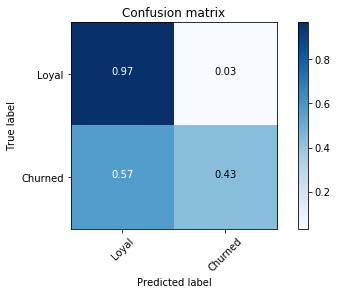

In [56]:
plot_confusion_matrix(cm,["Loyal","Churned"],True)

In [57]:
cm

array([[2300,   78],
       [ 352,  270]])